In [3]:
from scipy.io import wavfile
from scipy.stats import zscore
import seaborn
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline 

In [21]:
dataset='slumlordreach'
if dataset=='slumlordreach':
    data_prefix='/jukebox/griffiths/bert-brains/code/bert-brains/data/slumlordreach/'
    phoneme_counts=np.load(data_prefix+"slumlordreach_phoneme_counts.npy").reshape((-1,1))
    word_counts=np.load(data_prefix+"slumlordreach_word_counts.npy").reshape((-1,1))
    phoneme_vectors=np.load(data_prefix+"slumlordreach_phoneme_vectors.npy")
    audio_file='/jukebox/hasson/snastase/narratives/stimuli/slumlordreach_audio.wav'
else:
    data_prefix='/jukebox/griffiths/bert-brains/code/bert-brains/data/black/'
    phoneme_counts=np.load(data_prefix+"black_phoneme_counts.npy").reshape((-1,1))
    word_counts=np.load(data_prefix+"black_word_counts.npy").reshape((-1,1))
    phoneme_vectors=np.load(data_prefix+"black_phoneme_vectors.npy")
    audio_file='/jukebox/hasson/snastase/narratives/stimuli/black_audio.wav'

nuisance=np.hstack([phoneme_counts,word_counts,phoneme_vectors])
nuisance.shape

(1177, 42)

In [26]:
dt = np.arange(0, 15) 
p = 8.6 
q = 0.547
hrf = ((dt / (p * q)) ** p) * np.exp(p - dt / q)
frequency, audio = wavfile.read(audio_file)
duration = np.round(len(audio) / float(frequency)).astype(int)
tr=1.5 
print(int(np.round(duration / tr))+1)
#n_trs=nuisance.shape[0]
n_trs=int(np.round(duration / tr))+1
print(n_trs)
int(np.round(duration / tr))+1-nuisance.shape[0]

1202
1202


25

In [17]:
envelope = np.array([np.sqrt(np.mean(t ** 2)) for t in np.array_split(audio, duration)])
envelope[np.isnan(envelope)]=np.nanmean(envelope)
envelope = zscore(np.interp(np.linspace(0, (n_trs - 1) * tr, n_trs),np.arange(0, duration), envelope))

/usr/people/sreejank/anaconda3/envs/fmri/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


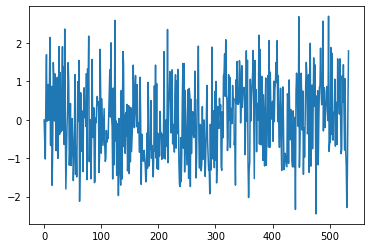

In [20]:
plt.plot(envelope)
np.save(data_prefix+"sound_envelope.npy",envelope)